In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
df = pd.read_csv("BTB_dev.csv")

In [28]:
df.head(10)

,Unnamed: 0,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,...,0.0,0.0,0.000,59570.000,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,...,0.0,0.0,0.000,59570.000,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,...,4.5,0.0,0.000,60444.379,0.0,0.0,0.0,0.0,0.0,0.0
3,3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,...,257.7,0.0,0.000,60130.453,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,...,-368.8,0.0,0.000,60452.641,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1227,35.6836,-5.3794,1,0.000,0.000,0.000,-9.000,0.020,...,0.0,0.0,0.000,59570.000,2.3,11.6,31.6,240.0,632.4,1187.7
6,6,1598,347.8467,-64.7609,1,0.135,0.182,0.030,39.728,0.019,...,-135.1,0.0,0.000,60628.816,0.0,0.0,0.0,0.0,0.0,0.0
7,7,1632,348.5959,-63.0726,1,0.686,0.701,0.010,43.152,0.021,...,-626.6,3.1,0.051,59602.090,0.0,0.0,0.0,0.0,0.0,0.0
8,8,1920,149.4141,3.4338,1,0.309,0.323,0.336,41.140,0.027,...,-290.8,0.0,0.000,59996.625,0.0,0.0,0.0,0.0,0.0,0.0
9,9,1926,149.4141,1.9401,1,0.000,0.000,0.000,-9.000,0.018,...,0.0,0.0,0.000,59570.000,16.6,130.6,450.4,2237.3,4903.2,8229.6


In [29]:
df = df.drop("Unnamed: 0", axis=1)

## Feature Variables:

**object_id:** Unique object identifier. 


**ra:** Right Ascension, sky coordinate: co-longitude in degrees. 


**decl:** Declination, sky coordinate: co-latitude in degrees. 


**ddf:** A flag to identify the object as coming from the DDF survey area (with value DDF = 1 for the DDF, DDF = 0 for the WFD survey).

**hostgal_specz:** The spectroscopic redshift of the source. This is an extremely accurate measure of redshift.


**hostgal_photoz:** The photometric redshift of the host galaxy of the astronomical source. While this is meant to be a proxy for hostgal_specz, there can be large differences between the two and should be regarded as a far less accurate version of hostgal_specz. 

[**Redshift:** It is the displacement of the spectrum of an astronomical object, which is moving away from us, toward longer (red) wavelengths.]


**hostgal_photoz_err:** The uncertainty on the hostgal_photoz based on survey projections. 


**distmod:** The distance to the source calculated from hostgal_photoz and using general relativity. 

**true_distmod:** The distance to the source calculated from hostgal_specz and using general relativity. 


**mwebv:** MW E(B-V). this ‘extinction’ of light is a property of the Milky Way (MW) dust along the line of sight to the astronomical source, and is thus a function of the sky coordinates of the source ra, decl. 


**true_lensdmu:** : Mag shift from weak lensing.

**true_vpec:** : Host galaxy peculiar velocity (km/s). 

**true_rv:** : RV for host galaxy exinction.

**true_av:** : AV for host galaxy exinction.

**true_peakmjd:** True MJD-time(Modified Julian Date) of peak brightness.

**true_u:** Source-flux for band = u.

**true_g:** Source-flux for band = u.

**true_r:** Source-flux for band = u.

**true_i:** Source-flux for band = u.

**true_z:** Source-flux for band = u.

**true_y:** Source-flux for band = u.

[Flux magnitudes are the total flux (or light) received in the frequency bands.]

## Target Variable: 'Target' (Class of astronomical source)

|**Class Number** | **Class Name** |  
|-----------------|----------------|
| 90 | Type Ia Suprnova|
|67| Peculiar Type Ia SN: 91bg-like|
|52| Peculiar Type Ia SN: SNIax|
|42| Type II SN |
|62| Type Ibc SN|
|95| Superluminous SN (Magnetar)|
|15| Tidal disruption event|
|64| Kilonova|
|88| Active Galactic Nuclei|
|92| RR Lyrae|
|65| M-dwarf stellar flare|
|16| Eclipsing Binary Stars|
|53| Mira variables |
|6 | Microlens from single lens|

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   object_id           7848 non-null   int64  
 1   ra                  7848 non-null   float64
 2   decl                7848 non-null   float64
 3   ddf_bool            7848 non-null   int64  
 4   hostgal_specz       7848 non-null   float64
 5   hostgal_photoz      7848 non-null   float64
 6   hostgal_photoz_err  7848 non-null   float64
 7   distmod             7848 non-null   float64
 8   mwebv               7848 non-null   float64
 9   target              7848 non-null   int64  
 10  true_distmod        7848 non-null   float64
 11  true_lensdmu        7848 non-null   float64
 12  true_vpec           7848 non-null   float64
 13  true_rv             7848 non-null   float64
 14  true_av             7848 non-null   float64
 15  true_peakmjd        7848 non-null   float64
 16  tflux_

In [31]:
df.describe()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,...,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719382,-27.254849,0.269623,0.254438,0.357882,0.155699,26.373072,0.081953,60.895387,...,2.137322,0.474006,0.032735,59946.827096,265.646152,2066.388277,2523.983869,2427.426555,2320.092775,2121.793756
std,4.347364e+07,114.212761,20.248556,0.443792,0.330056,0.545547,0.300364,23.030558,0.150598,28.767984,...,243.315940,1.115749,0.127110,368.889675,1139.764604,9840.254171,12007.001716,10225.545751,8559.673003,7687.389494
min,6.150000e+02,0.175800,-64.760900,0.000000,0.000000,0.000000,0.000000,-9.000000,0.003000,6.000000,...,-1096.800000,0.000000,0.000000,58220.414000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.180865e+05,62.402300,-44.598000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.018000,42.000000,...,-85.000000,0.000000,0.000000,59570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.131719e+07,150.996100,-27.279600,0.000000,0.183000,0.210000,0.018000,40.078500,0.032000,65.000000,...,0.000000,0.000000,0.000000,59875.762000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.665901e+07,282.875950,-8.838300,1.000000,0.350000,0.431000,0.122250,41.877000,0.076000,90.000000,...,100.125000,0.000000,0.000000,60265.803000,25.350000,131.550000,287.225000,705.550000,805.000000,694.000000
max,1.307798e+08,359.824200,4.181500,1.000000,3.445000,2.999000,1.735000,47.026000,2.747000,95.000000,...,1181.600000,3.100000,2.330000,61197.316000,29042.200000,161508.600000,180588.000000,151136.900000,166923.300000,186648.000000


In [32]:
df.isna().sum()

object_id             0
ra                    0
decl                  0
ddf_bool              0
hostgal_specz         0
hostgal_photoz        0
hostgal_photoz_err    0
distmod               0
mwebv                 0
target                0
true_distmod          0
true_lensdmu          0
true_vpec             0
true_rv               0
true_av               0
true_peakmjd          0
tflux_u               0
tflux_g               0
tflux_r               0
tflux_i               0
tflux_z               0
tflux_y               0
dtype: int64

No missing values.

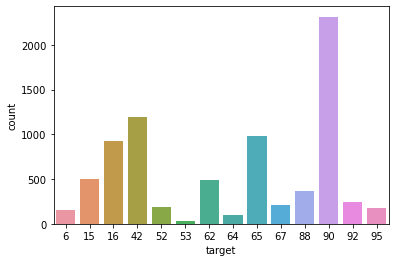

In [33]:
sns.countplot(x=df["target"]);

In [34]:
df["target"].value_counts() 

90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: target, dtype: int64

We clearly have an imbalanced dataset.

       hostgal_specz  true_peakmjd      true_rv
count    7848.000000   7848.000000  7848.000000
mean        0.254438  59946.827096     0.474006
std         0.330056    368.889675     1.115749
min         0.000000  58220.414000     0.000000
25%         0.000000  59570.000000     0.000000
50%         0.183000  59875.762000     0.000000
75%         0.350000  60265.803000     0.000000
max         3.445000  61197.316000     3.100000


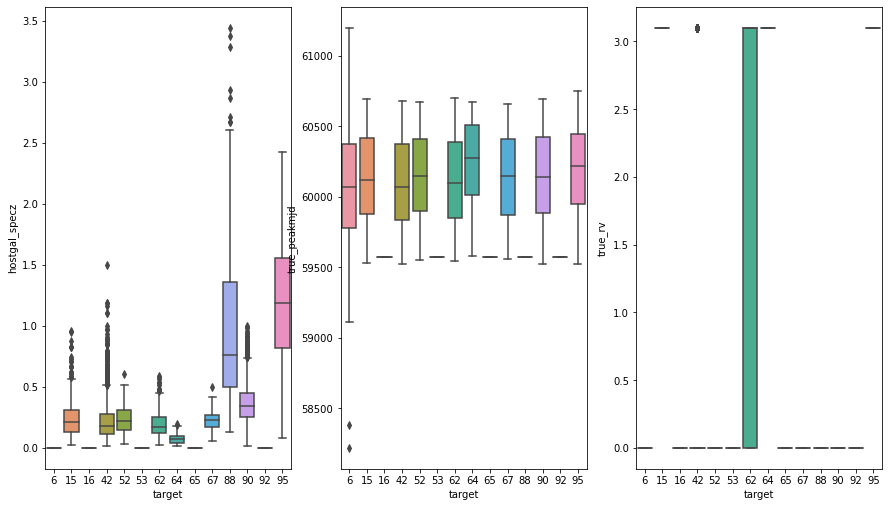

In [35]:
features = ["hostgal_specz", "true_peakmjd", "true_rv"]
fig,axes = plt.subplots(1,3,figsize=(15,8.5))
for idx,cat_col in enumerate(features):
    sns.boxplot(y=cat_col,data=df,x='target',ax=axes[idx])

print(df[features].describe())
plt.subplots_adjust(hspace=1)

         true_vpec  true_lensdmu      true_av
count  7848.000000   7848.000000  7848.000000
mean      2.137322     -0.002562     0.032735
std     243.315940      0.014481     0.127110
min   -1096.800000     -0.307000     0.000000
25%     -85.000000     -0.003000     0.000000
50%       0.000000      0.000000     0.000000
75%     100.125000      0.000000     0.000000
max    1181.600000      0.080000     2.330000


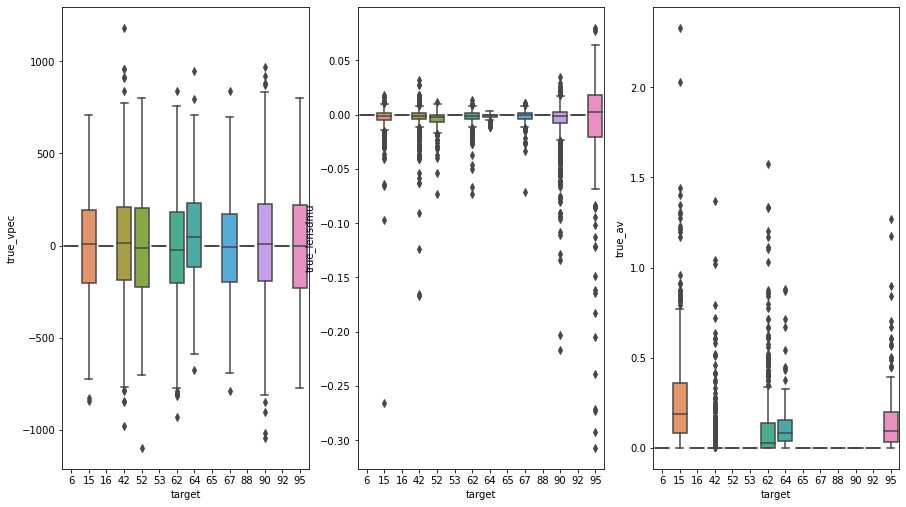

In [36]:
features = ["true_vpec", "true_lensdmu", "true_av"]
fig,axes = plt.subplots(1,3,figsize=(15,8.5))
for idx,cat_col in enumerate(features):
    sns.boxplot(y=cat_col,data=df,x='target',ax=axes[idx])

print(df[features].describe())
plt.subplots_adjust(hspace=1)

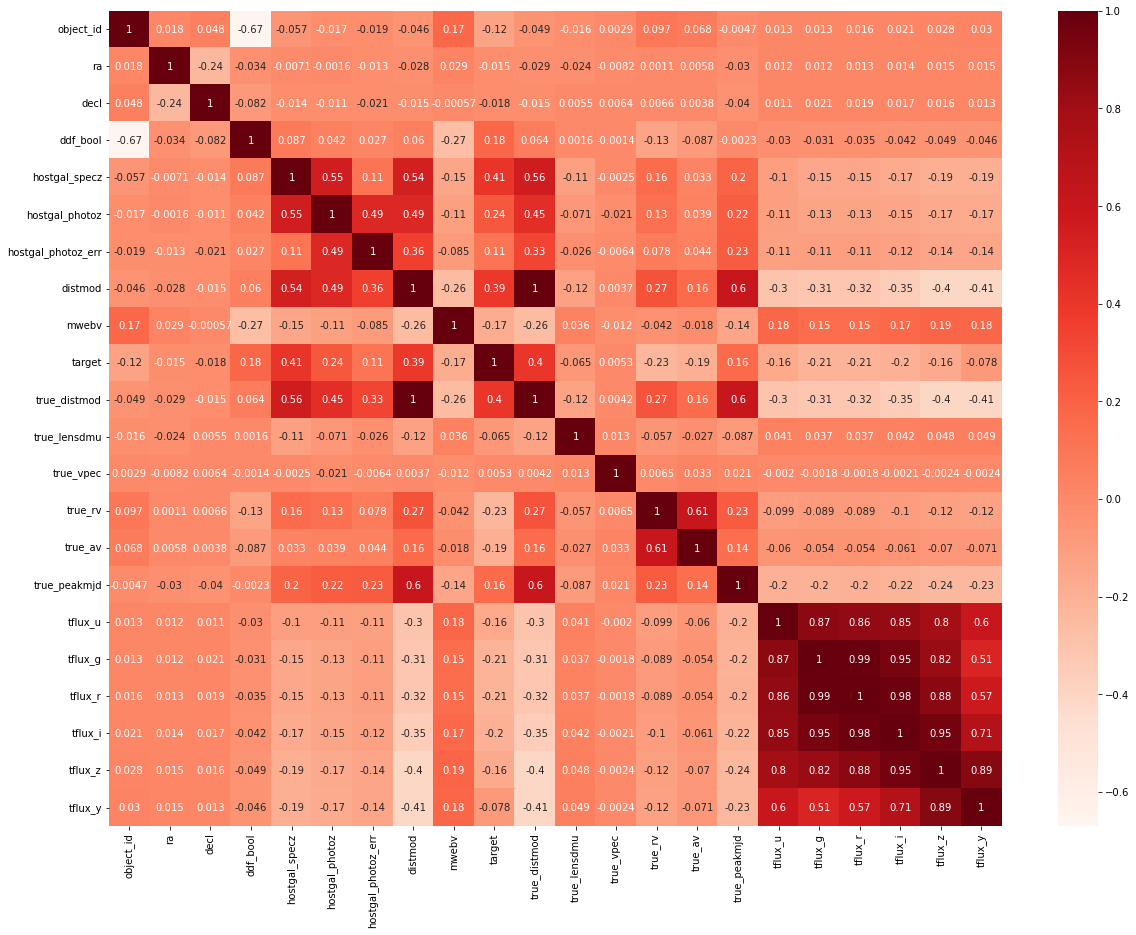

In [37]:
plt.figure(figsize=(20, 15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Resampling

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [39]:
X = df.drop("target", axis=1)
Y = df["target"]

In [40]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

counter = Counter(Y)
for k,v in counter.items():
  per = v / len(Y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=92, n=2313 (7.143%)
Class=88, n=2313 (7.143%)
Class=42, n=2313 (7.143%)
Class=90, n=2313 (7.143%)
Class=65, n=2313 (7.143%)
Class=16, n=2313 (7.143%)
Class=67, n=2313 (7.143%)
Class=95, n=2313 (7.143%)
Class=62, n=2313 (7.143%)
Class=15, n=2313 (7.143%)
Class=52, n=2313 (7.143%)
Class=6, n=2313 (7.143%)
Class=64, n=2313 (7.143%)
Class=53, n=2313 (7.143%)


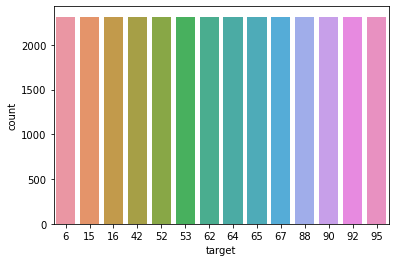

In [41]:
sns.countplot(x=Y);

#### Splitting and Training

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_preds = dtc.predict(X_test)

print(Y_preds[:20])

[15 53  6  6 90 67 62 95 53 64 90 16 92  6 64 62 64 92 90 92]


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = classification_report(Y_test, Y_preds)
print("Classification Report:",)
print(result1)
result2 = accuracy_score(Y_test, Y_preds)
print("Accuracy:", result2)

Classification Report:
              precision    recall  f1-score   support

           6       1.00      0.99      1.00       693
          15       0.79      0.79      0.79       701
          16       0.98      0.99      0.99       684
          42       0.45      0.42      0.43       726
          52       0.67      0.74      0.70       644
          53       0.99      0.98      0.98       686
          62       0.67      0.68      0.68       696
          64       0.92      0.95      0.93       679
          65       0.97      0.99      0.98       670
          67       0.70      0.76      0.73       743
          88       1.00      1.00      1.00       684
          90       0.62      0.53      0.57       707
          92       0.99      0.98      0.99       700
          95       0.97      0.95      0.96       702

    accuracy                           0.84      9715
   macro avg       0.84      0.84      0.84      9715
weighted avg       0.84      0.84      0.84      9715

Ac